In [30]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import NamedTuple, List,Tuple
from dataclasses import dataclass
from fractions import Fraction

from gt.solutions.br import BrownRobinsonOptimizer,Strategies

In [31]:
def MatrixMethod(strategy_costs) -> Strategies:
    if np.linalg.det(strategy_costs):
        strategy_costs_inverse = np.linalg.inv(strategy_costs)
        u = np.ones(strategy_costs.shape[0])
        game_cost = 1 / (u @ strategy_costs_inverse @ u.T)

        A = (u @ strategy_costs_inverse) * game_cost
        B = (strategy_costs_inverse @ u.T) * game_cost

        print(f"Analytical method for A* : {A}, B* : {B}, max loss/profit: {game_cost:.3f}")
        return Strategies(A=list(A), B=list(B)), float(game_cost)
    else:
        raise RuntimeError("Cannot converge since determinant is zero")


In [32]:
C_book = np.array([[6, 15, 16],
                   [15, 10, 0],
                   [10, 7, 10]])
C_video = np.array([[5, 7, 4],
                    [3, 5, 6],
                    [6, 4, 5]])
C_my = np.array([
    [19, 7, 3],
    [6, 9, 9],
    [8, 2, 11],
    
])

C = C_my

In [44]:
%%time

opt = BrownRobinsonOptimizer(C, verbose=True, max_steps=100_000)
strategies_robinson, game_states = opt.fit(0.1)
strategies_matrix, game_cost = MatrixMethod(C)

df = pd.DataFrame(game_states)
df = df.rename(columns={
    "step": "Шаг",
    "game_cost_current": "Величина ошибки",
    "A_income": "Выигрыши А",
    "B_loss": "Проигрыши Б",
    "A_frequencies": "Стратегия А",
    "B_frequencies": "Стратегия Б",
    "A_strategy": "Выбор А",
    "B_strategy": "Выбор Б",
    "min_win": "Минимальный выигрыш",
    "max_loss": "Максимальный проигрыш",
})
display(df.round(2))
print(f"Погрешность: {abs(float(game_states[-1].min_win) - game_cost)/game_cost*100:.2f}%")

Analytical method for A* : [0.15789474 0.77192982 0.07017544], B* : [0.26900585 0.22222222 0.50877193], max loss/profit: 8.193


,Шаг,Величина ошибки,Выигрыши А,Проигрыши Б,Стратегия А,Стратегия Б,Выбор А,Выбор Б,Минимальный выигрыш,Максимальный проигрыш
0,1,16,"[19.0, 6.0, 8.0]","[19.0, 7.0, 3.0]","[[14.0, 91.0, 4.0]]","[[28.0, 27.0, 54.0]]",0,0,19,3
1,2,8,"[22.0, 15.0, 19.0]","[38.0, 14.0, 6.0]","[[14.0, 91.0, 4.0]]","[[28.0, 27.0, 54.0]]",0,2,11,3
2,3,7,"[25.0, 24.0, 30.0]","[57.0, 21.0, 9.0]","[[14.0, 91.0, 4.0]]","[[28.0, 27.0, 54.0]]",0,2,10,3
3,4,5,"[28.0, 33.0, 41.0]","[65.0, 23.0, 20.0]","[[14.0, 91.0, 4.0]]","[[28.0, 27.0, 54.0]]",2,2,10,5
4,5,5,"[31.0, 42.0, 52.0]","[73.0, 25.0, 31.0]","[[14.0, 91.0, 4.0]]","[[28.0, 27.0, 54.0]]",2,2,10,5
5,6,4,"[38.0, 51.0, 54.0]","[81.0, 27.0, 42.0]","[[14.0, 91.0, 4.0]]","[[28.0, 27.0, 54.0]]",2,1,9,5
6,7,25/7,"[45.0, 60.0, 56.0]","[89.0, 29.0, 53.0]","[[14.0, 91.0, 4.0]]","[[28.0, 27.0, 54.0]]",2,1,60/7,5
7,8,25/7,"[52.0, 69.0, 58.0]","[95.0, 38.0, 62.0]","[[14.0, 91.0, 4.0]]","[[28.0, 27.0, 54.0]]",1,1,60/7,5
8,9,211/63,"[59.0, 78.0, 60.0]","[101.0, 47.0, 71.0]","[[14.0, 91.0, 4.0]]","[[28.0, 27.0, 54.0]]",1,1,60/7,47/9
9,10,104/35,"[66.0, 87.0, 62.0]","[107.0, 56.0, 80.0]","[[14.0, 91.0, 4.0]]","[[28.0, 27.0, 54.0]]",1,1,60/7,28/5


Погрешность: 0.44%
Wall time: 500 ms


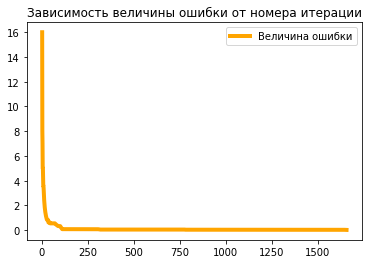

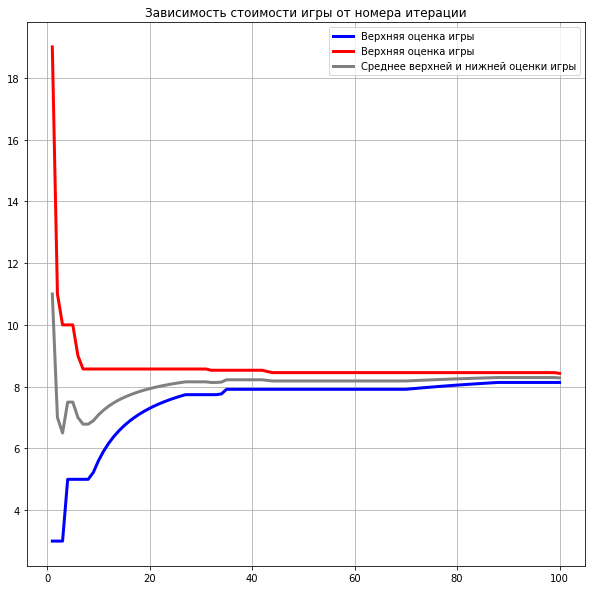

In [34]:
plt.plot(range(1, len(game_states)+1), [state.game_cost_current for state in game_states], 
         label="Величина ошибки", color="orange", linewidth=4)
plt.title("Зависимость величины ошибки от номера итерации")
plt.legend(loc=1)
plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.gca()
max_steps = 100
plt.plot(range(1, min(len(game_states), max_steps)+1), 
         [state.max_loss for state in game_states[:max_steps]], 
         label="Верхняя оценка игры", color="blue", linewidth=3)
plt.plot(range(1, min(len(game_states), max_steps)+1), 
         [state.min_win for state in game_states[:max_steps]], 
         label="Верхняя оценка игры", color="red", linewidth=3)
plt.plot(range(1, min(len(game_states), max_steps)+1), 
         [(state.min_win + state.max_loss)/2 for state in game_states[:max_steps]], 
         label="Среднее верхней и нижней оценки игры", color="grey", linewidth=3)
plt.grid(True)
plt.title("Зависимость стоимости игры от номера итерации")
plt.legend(loc=1)
plt.show()



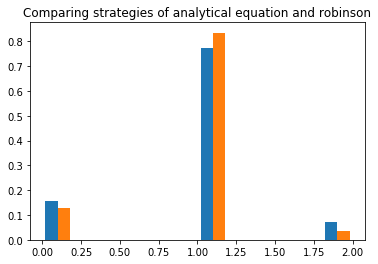

In [49]:
plt.title("Comparing strategies of analytical equation and robinson")
plt.hist(([0, 1, 2], [0, 1, 2]), 
         weights=(strategies_matrix.A, strategies_robinson.A))
plt.show()

([array([0.26900585, 0.        , 0.        , 0.        , 0.        ,
         0.22222222, 0.        , 0.        , 0.        , 0.50877193]),
  array([0.26779252, 0.        , 0.        , 0.        , 0.        ,
         0.22798552, 0.        , 0.        , 0.        , 0.50422195])],
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 Lists of Patches objects>)

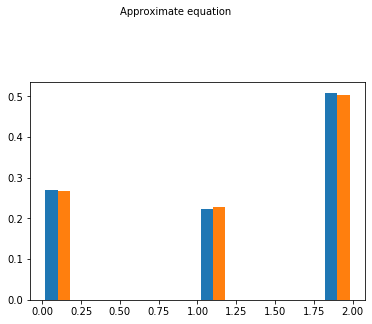

In [20]:
plt.text(0.5, 0.7, "Approximate equation")
plt.hist(([0, 1, 2], [0, 1, 2]), weights=(strategies_matrix.B, strategies_robinson.B))